### 자연어 처리 리뷰활용
* konlpy를 이용한 자연어처리
* 64bit mem 8G 이상 요망


In [78]:
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

### 형태소 분석기 초기화

In [79]:
hannanum = Hannanum()
kkma = Kkma()
# komoran = Komoran() 메모리
###mecab = Mecab() 윈도우 지원 안해
okt = Okt()

In [80]:

c="안녕하세요 여러분"
kkma.nouns(c[:40])
#hannanum.nouns(c[:40])
#pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
#pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['안녕', '여러분']

In [1]:
dbname="nmovie.db"

In [82]:
def seldb():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,TITLE,CONTENT,POINT,TCODE
        from movie 

        """
#        where TCODE='"""+str(tcode)+"""'
#        order by IDX        
        data=cur.execute(sql).fetchall()
        xdata=[]
        ydata=[]
        i=0
        for d in data:
            xdata.append(i)
            ydata.append((d[2],d[3],d[4]))
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        return (xdata,ydata)

In [83]:
gdata=seldb()
print(gdata[1][:10])

[('한100번정도는 돌려본영화입니다.', 10, 157), ("같은 영화를 보면서 모든 사람이 다른 생각을 하고, 다르게 느낄 것이며, 다른 평을 할 것이다. 가볍게든 무겁게든 '토론'이 불가능한 영화...완벽하게 personalized 가 되는 영화가 아닐까.", 10, 3), ('워낙에 내용이 가벼워서 큰 기대 안했는데 생각보다 잼', 9, 7), ('바보같이 순수한 삶이 주는 따뜻한 감동 아름다운 명화', 10, 156), ('린치의 재기를 넘보고 폰트리에의 제목을 넘본다', 5, 155), ('기대이상. 평점 야박하네', 10, 154), ('티켓구매는햇으나 보지못함', 7, 22), ('영화를 보는 내내 빠져들었다.', 10, 28), ('새끼도령의 난지도 입문', 3, 7), ('그닥 스토리의 가벼움 극치', 5, 2)]


### 워드 클라우드 


In [84]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(24,24))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

#print(font_name)

<Figure size 1728x1728 with 0 Axes>

### 워드 클라우드를 위한 데이터 합치기

In [85]:
#plt.rcParams["font.family"] = 'Malgun Gothic'
from wordcloud import WordCloud
c=""
for g in gdata[1]:
    c+=g[0]

print(c[:100])


한100번정도는 돌려본영화입니다.같은 영화를 보면서 모든 사람이 다른 생각을 하고, 다르게 느낄 것이며, 다른 평을 할 것이다. 가볍게든 무겁게든 '토론'이 불가능한 영화...완벽


In [126]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 1920,
    height = 1080
)
w=w.generate(c)
w.words_
print(w)

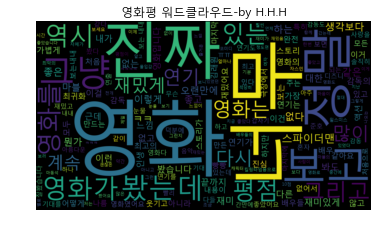

In [87]:
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드-by H.H.H")
plt.savefig('moviecloud.jpg')
plt.show()


In [88]:
f = open("stopmovie.txt", 'r',encoding='utf-8')
stopkr=[]
while True:
    line = f.readline()
    if not line: break
    stopkr.append(line.strip())
f.close()
print(stopkr[670:])

['일곱', '여덟', '아홉', '령', '영', '또는', '영화', '영화가', '영화를', '영화는']


### 불용어 제거 버전

In [89]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
word=word_tokenize(c)
print(word[:10])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['한100번정도는', '돌려본영화입니다.같은', '영화를', '보면서', '모든', '사람이', '다른', '생각을', '하고', ',']


In [90]:
newc=''
for w in word:
    if w not in stopkr:
        newc+=w.strip()+' '
print(newc[:100])

한100번정도는 돌려본영화입니다.같은 보면서 모든 사람이 생각을 하고 , 다르게 느낄 것이며 , 평을 할 것이다 . 가볍게든 무겁게든 '토론'이 불가능한 ... 완벽하게 perso


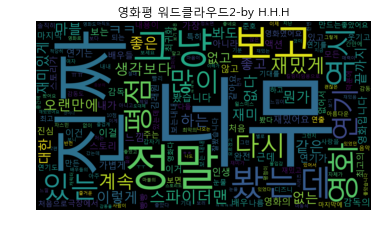

In [91]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 1920,
    height = 1080
)
w=w.generate(newc)
w.words_
print(w)
plt.imshow(w,interpolation='bilinear')
plt.axis('off')
plt.title("영화평 워드클라우드2-by H.H.H")
plt.savefig('moviecloud.jpg')
plt.show()

### 단어 빈출 분석을 통한 의미 분석
* 형태소 분석

In [92]:
ht=okt.pos(c)
print(ht[:50])

[('한', 'Verb'), ('100', 'Number'), ('번', 'Noun'), ('정도', 'Noun'), ('는', 'Josa'), ('돌려', 'Verb'), ('본', 'Modifier'), ('영화', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('같은', 'Adjective'), ('영화', 'Noun'), ('를', 'Josa'), ('보면서', 'Verb'), ('모든', 'Noun'), ('사람', 'Noun'), ('이', 'Josa'), ('다른', 'Noun'), ('생각', 'Noun'), ('을', 'Josa'), ('하고', 'Verb'), (',', 'Punctuation'), ('다르게', 'Adjective'), ('느낄', 'Verb'), ('것', 'Noun'), ('이며', 'Josa'), (',', 'Punctuation'), ('다른', 'Noun'), ('평', 'Noun'), ('을', 'Josa'), ('할', 'Verb'), ('것', 'Noun'), ('이다', 'Josa'), ('.', 'Punctuation'), ('가볍', 'Adjective'), ('게', 'Noun'), ('든', 'Josa'), ('무겁', 'Adjective'), ('게', 'Noun'), ('든', 'Josa'), ("'", 'Punctuation'), ('토론', 'Noun'), ("'", 'Punctuation'), ('이', 'Noun'), ('불가능한', 'Adjective'), ('영화', 'Noun'), ('...', 'Punctuation'), ('완벽하게', 'Adjective'), ('personalized', 'Alpha'), ('가', 'Verb')]


In [93]:
import json
import os,sys
import pprint

In [127]:
origin=gdata[1]
train_data=origin[:100]
test_data=origin[1200:]
res=[]
"""
def tokenize(data):
    res=[]
    for t in okt.pos(data,stem=True,norm=True):
        res.append('/'.join(t))
    return res
"""
def tokenize(data):
    res=[]
    return['/'.join(t)for t in okt.pos(data,stem=True,norm=True)]

def makedata(data):
    res=[]
    for td in data:
        res.append((tokenize(td[0]),td[1]))
    return res

r=makedata(train_data)
print(r[:10])
        
        



[(['하다/Verb', '100/Number', '번/Noun', '정도/Noun', '는/Josa', '돌리다/Verb', '본/Modifier', '영화/Noun', '이다/Adjective', './Punctuation'], 10), (['같다/Adjective', '영화/Noun', '를/Josa', '보다/Verb', '모든/Noun', '사람/Noun', '이/Josa', '다른/Noun', '생각/Noun', '을/Josa', '하다/Verb', ',/Punctuation', '다르다/Adjective', '느끼다/Verb', '것/Noun', '이며/Josa', ',/Punctuation', '다른/Noun', '평/Noun', '을/Josa', '하다/Verb', '것/Noun', '이다/Josa', './Punctuation', '가볍다/Adjective', '게/Noun', '든/Josa', '무겁다/Adjective', '게/Noun', '든/Josa', "'/Punctuation", '토론/Noun', "'/Punctuation", '이/Noun', '불가능하다/Adjective', '영화/Noun', '.../Punctuation', '완벽하다/Adjective', 'personalized/Alpha', '가다/Verb', '되다/Verb', '영화/Noun', '가/Josa', '아니다/Adjective', './Punctuation'], 10), (['워낙/Noun', '에/Josa', '내용/Noun', '이/Josa', '가볍다/Adjective', '크다/Verb', '기대/Noun', '안/VerbPrefix', '하다/Verb', '생각/Noun', '보다/Josa', '잼/Noun'], 9), (['바보/Noun', '같이/Josa', '순수하다/Adjective', '삶/Noun', '이/Josa', '주다/Verb', '따뜻하다/Adjective', '감동/Noun', '아름답다/Adjective', '명화/Noun